Upload dataset from Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import pandas as pd 
data=pd.read_json('/content/drive/My Drive/updatedFitDF.json', lines=True,orient='columns')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
data.head()

,bra size,category,cup size,fit,height,hips,item_id,length,quality,shoe size,shoe width,size,user_id,age,body type,bust size,rented for,weight,fit_to_numeric
0,34,new,d,small,167.6,38.000000,123373,just right,5.0,0.0,Unspecified,7,991571,33,Unspecified,Unspecified,Unspecified,137.391709,1
1,36,new,b,small,157.5,30.000000,123373,just right,3.0,0.0,Unspecified,13,587883,33,Unspecified,Unspecified,Unspecified,137.391709,1
2,32,new,b,small,170.2,40.358501,123373,slightly long,2.0,9.0,Unspecified,7,395665,33,Unspecified,Unspecified,Unspecified,137.391709,1
3,36,new,dd/e,fit,165.1,40.358501,123373,just right,5.0,0.0,Unspecified,21,875643,33,Unspecified,Unspecified,Unspecified,137.391709,2
4,36,new,b,small,157.5,40.358501,123373,slightly long,5.0,0.0,Unspecified,18,944840,33,Unspecified,Unspecified,Unspecified,137.391709,1


Delete some of the columns which are not so important for analysis 

In [0]:
del data['quality']
del data['cup size']
del data['hips']
del data['bra size']
del data['height']
del data['length']
del data['shoe size']
del data['shoe width']
del data['bust size']

In [5]:
data.head()

,category,fit,item_id,size,user_id,age,body type,rented for,weight,fit_to_numeric
0,new,small,123373,7,991571,33,Unspecified,Unspecified,137.391709,1
1,new,small,123373,13,587883,33,Unspecified,Unspecified,137.391709,1
2,new,small,123373,7,395665,33,Unspecified,Unspecified,137.391709,1
3,new,fit,123373,21,875643,33,Unspecified,Unspecified,137.391709,2
4,new,small,123373,18,944840,33,Unspecified,Unspecified,137.391709,1


Delete other columns like weight, body type and age

In [0]:
del data['weight']
del data['body type']
del data['age']

In [7]:
data.head()

,category,fit,item_id,size,user_id,rented for,fit_to_numeric
0,new,small,123373,7,991571,Unspecified,1
1,new,small,123373,13,587883,Unspecified,1
2,new,small,123373,7,395665,Unspecified,1
3,new,fit,123373,21,875643,Unspecified,2
4,new,small,123373,18,944840,Unspecified,1


Delete columns like rented for and fit

In [0]:
del data['rented for']
del data['fit']

In [9]:
data.head()

,category,item_id,size,user_id,fit_to_numeric
0,new,123373,7,991571,1
1,new,123373,13,587883,1
2,new,123373,7,395665,1
3,new,123373,21,875643,2
4,new,123373,18,944840,1


In [10]:
type(data['category'][0])

str

Use One Hot Encoding and Label Encoding for categorical values like category

In [0]:
# Initially I used Label Encodeing for category as I was planning to use SVM algorithm, and it is preferable to use less number of features for SVM Algorithm
# But as SVM algorithm was not working properly with so huge dataset, I transitioned to Logistic Regression
# So I used One Hot Encoding as Logistic Regression works well with more number of features.
# Import label encoder 
from sklearn.preprocessing import OneHotEncoder 
from sklearn import preprocessing 


label_encoder = preprocessing.LabelEncoder() 
data['category']= label_encoder.fit_transform(data['category']) 

onthot=pd.get_dummies(data['category'])
#onehotencoder = OneHotEncoder(categorical_features = [0]) 
df = data.drop('category',axis=1) 
df = df.join(onthot) 

  
# # label_encoder object knows how to understand word labels. 
# label_encoder = preprocessing.LabelEncoder() 
  
# # Encode labels in column 'species'. 
# data['fit']= label_encoder.fit_transform(data['fit']) 
  
# data['fit'].unique() 

In [12]:
df.head()

,item_id,size,user_id,fit_to_numeric,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,123373,7,991571,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,123373,13,587883,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,123373,7,395665,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,123373,21,875643,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,123373,18,944840,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# data['category']= label_encoder.fit_transform(data['category']) 
  
# data['category'].unique()

Check length of columns

In [13]:
len(df.columns)

64

In [0]:
# x=pd.DataFrame(df.iloc[pd.np.r_[0:2, 4:63]])
# y=pd.DataFrame(df.iloc[:, 3])

Assigning 'fit to numeric' column data to y, and assign all other column data to X

In [0]:
x=df.drop('fit_to_numeric',axis=1)
y=df['fit_to_numeric']

Use train test split method to divide train and test set

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

Using Logistic Regression Model for predicting fit

In [0]:
# By default solver for Logistic Regression is lbfgs. Different solvers which can be used here are newton-cg and sag
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=2000)
# Train model with solver = "saga"
# logmodel=LogisticRegression(random_state=0, solver='saga',multi_class='multinomial',max_iter=2000)

Training the model using Logistic Regression

In [18]:
logmodel.fit(X_train,y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predicting the Fit

In [0]:
y_pred=logmodel.predict(X_test)

Calculate Accuracy score for Logistic Model 

In [20]:
print(logmodel.score(X_test,y_test))

0.72311910944849


Calculate Error for algorithm model

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
score = accuracy_score(y_test, y_pred,normalize=True, sample_weight=None)
print(mean_squared_error(y_test,y_pred))

0.27688089055151


Make Classification report for algorithm

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      7661
           2       0.72      1.00      0.84     39820
           3       0.00      0.00      0.00      7586

    accuracy                           0.72     55067
   macro avg       0.24      0.33      0.28     55067
weighted avg       0.52      0.72      0.61     55067



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Developing Confusion Matrix for obtained results 

Confusion matrix, without normalization
[[    0  7661     0]
 [    0 39820     0]
 [    0  7586     0]]


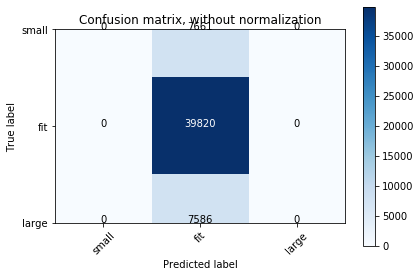

In [0]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
# confusion_matrix=confusion_matrix(y_test,y_pred)
# print(confusion_matrix)
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['small','fit','large'],
                      title='Confusion matrix, without normalization')